In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming 'spam.csv' is in the same directory)
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df.columns = ['label', 'message']
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)



In [261]:
# Count of ham and spam
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
import plotly.express as px

In [262]:
# Create a simple dataframe for sunburst (total → label)
sunburst_df = pd.DataFrame({
    'parent': ['Total', 'Total'],
    'labels': ['ham', 'spam'],
    'value': [label_counts[label_counts['label'] == 'ham']['count'].values[0],
              label_counts[label_counts['label'] == 'spam']['count'].values[0]]
})
# Add root node
sunburst_df = pd.concat([
    pd.DataFrame({'parent': [''], 'labels': ['Total'], 'value': [sunburst_df['value'].sum()]}),
    sunburst_df
], ignore_index=True)

# Plot sunburst chart
fig = px.sunburst(
    sunburst_df,
    names='labels',
    parents='parent',
    values='value',
    title='SMS Spam Dataset Distribution (Sunburst View)',
    color='labels',
    color_discrete_map={'ham': 'green', 'spam': 'red', 'Total': 'lightblue'}
)
fig.show()

In [263]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [264]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [265]:
df.shape

(5169, 3)

In [266]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [267]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


In [268]:
# Count of ham and spam
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
import plotly.express as px

In [269]:
# Create a simple dataframe for sunburst (total → label)
sunburst_df = pd.DataFrame({
    'parent': ['Total', 'Total'],
    'labels': ['ham', 'spam'],
    'value': [label_counts[label_counts['label'] == 'ham']['count'].values[0],
              label_counts[label_counts['label'] == 'spam']['count'].values[0]]
})
# Add root node
sunburst_df = pd.concat([
    pd.DataFrame({'parent': [''], 'labels': ['Total'], 'value': [sunburst_df['value'].sum()]}),
    sunburst_df
], ignore_index=True)

# Plot sunburst chart
fig = px.sunburst(
    sunburst_df,
    names='labels',
    parents='parent',
    values='value',
    title='SMS Spam Dataset Distribution (Sunburst View)',
    color='labels',
    color_discrete_map={'ham': 'green', 'spam': 'red', 'Total': 'lightblue'}
)
fig.show()

In [270]:
df['num_characters'] = df['message'].apply(len)

In [271]:
df.head()

,label,message,label_num,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


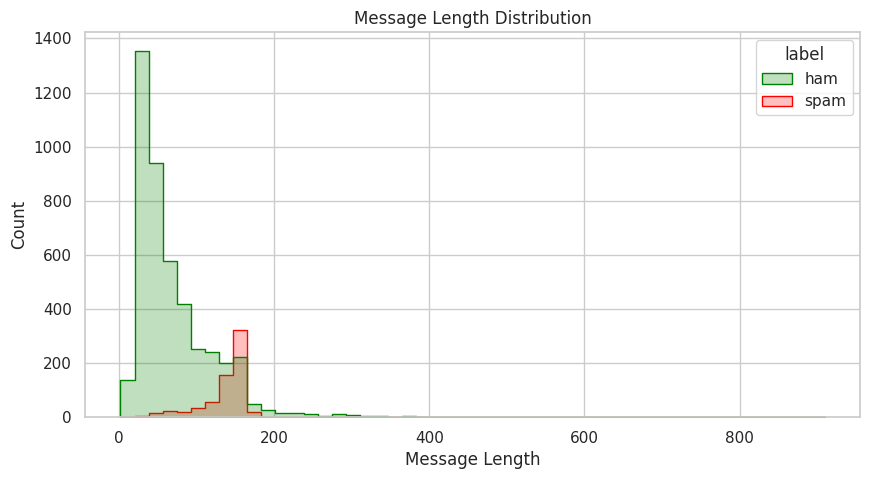

In [272]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='length', hue='label', element='step', bins=50, palette={'ham': 'green', 'spam': 'red'})
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

In [273]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [274]:
# num of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [275]:

df.head()

,label,message,label_num,num_characters,length,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15


In [276]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [277]:
df.head()

,label,message,label_num,num_characters,length,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1


In [278]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources if you haven't already:
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [279]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [280]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [281]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [282]:
df['transformed_text'] = df['message'].apply(transform_text)

In [283]:
df.head()

,label,message,label_num,num_characters,length,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1,nah think goe usf live around though


In [284]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [285]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [286]:
X.shape

(5169, 3000)

In [287]:
y = df['label_num'].values

In [288]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [289]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]


In [290]:
print(precision_score(y_test,y_pred1))

0.5181818181818182


In [291]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [292]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [294]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [295]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [296]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [297]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [298]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    # Use y_train (numerical labels) instead of df['label']
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [299]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [300]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")




performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.965184
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.933269


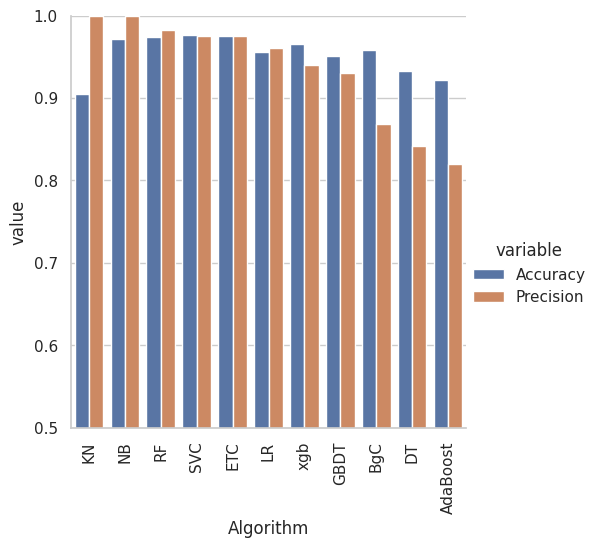

In [301]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [302]:
# model improve
# 1. Change the max_features parameter of TfIdf




temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)




temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)




new_df = performance_df.merge(temp_df,on='Algorithm')




new_df_scaled = new_df.merge(temp_df,on='Algorithm')




temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)




new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655,0.965184,0.939655
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [303]:
df.to_excel("cleaned_spam_data.xlsx", index=False)

In [304]:
import gradio as gr
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [305]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)


In [306]:
def predict_message(msg):
    msg_clean = preprocess(msg)
    msg_vector = tfidf.transform([msg_clean])
    prediction = mnb.predict(msg_vector)[0]
    return "Phishing ⚠️" if prediction == 1 else "Legitimate ✅"


In [307]:
# Gradio UI
iface = gr.Interface(
    fn=predict_message,
    inputs=gr.Textbox(lines=5, label="Enter your email or message text here"),
    outputs=gr.Textbox(label="Prediction"),
    title="📩 SMS/Email Spam Detector",
    description="Paste your message below and detect whether it's PHISING or LEGITIMATE."
)

# Launch the app
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://52aa797ae002234e9e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
